# Solar Production Data Analysis

## Objective
This notebook will analysis solar production data using the data science lifecyce outlined here: link
https://docs.google.com/document/d/1gKr6j7s02hjilNhqYrjDK7t6jqR092hzezn-MB09EZo/edit#heading=h.mbjsiz6n6jlo

## Contents:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

python version: 3.9.0

requirements:
see imports

## 0 Setup

### 0.1 Load Packages

In [48]:
import pandas as pd # pandas for data manipulation / analysis
import numpy as np # numpy for math
import matplotlib.pyplot as plt # pyplot for plotting and visualization
import datetime # datetime for computing times
import seaborn as sns # fancier plots
import statsmodels.api as statsmodels # for regression
from scipy import stats # more regression (and other statistics)
from sklearn import linear_model # regression model

from pylab import rcParams
rcParams['figure.figsize'] = 15, 8 # set figsize for all future plots

### 0.2 Load Data

In [72]:
df_production = pd.read_csv('/Users/katherineli/Downloads/daily_contract_production (1).csv', header = None)
df_production.columns = ['holding_company_id', 'project_company_id', 'contract_id', 'size_kwdc', 'created_on', \
                'updated_on', 'production_date', 'ato_date', 'actual_kwh', 'expected_kwh', \
                'weather_adjusted_expected_kwh']
df_contracts = pd.read_csv('/Users/katherineli/Downloads/d_contracts.csv')

df = df_production.join(df_contracts.set_index('id'), on = 'contract_id', rsuffix="DROP").filter(regex="^(?!.*DROP)")

df.head()

,holding_company_id,project_company_id,contract_id,size_kwdc,created_on,updated_on,production_date,ato_date,actual_kwh,expected_kwh,...,host_type,revenue_type,interconnection_type,registry_facility_name,cref_short_name,subscriber_orginization,system_yield_as_built,system_yield_finance,annual_degradation_engr,annual_degradation_finance
0,15,44,4FbAzTVD,25.13,2021-02-24 03:49:53.575000,2021-02-24 03:53:14.940699,2019-01-01 00:00:00.000000,2018-11-29,NaN,42.908097,...,C&I,NEM,NEM,NON241648,NaN,NaN,1131.0,1131.0,0.005,NaN
1,14,50,56XBWDhT,40.00,2021-02-24 03:49:53.575000,2021-02-24 03:53:14.940699,2019-01-01 00:00:00.000000,2018-09-28,NaN,71.340590,...,C&I,NEM,NEM,NON241695,NaN,NaN,954.7,1170.0,0.005,0.005
2,28,71,5Q6T8Cm7,6.70,2021-02-24 03:49:53.575000,2021-02-24 03:53:14.940699,2019-01-01 00:00:00.000000,2018-11-28,0.139945,12.643548,...,Residential,NEM,NEM,NON241642,NaN,NaN,1250.0,1250.0,0.005,0.005
3,14,43,8EaZmYXK,26.18,2021-02-24 03:49:53.575000,2021-02-24 03:53:14.940699,2019-01-01 00:00:00.000000,2018-03-10,23.113000,50.342822,...,C&I,CREF,CREF,NON241367,NCS07,Arcadia,1240.8,1327.0,0.005,NaN
4,15,44,8GniqiNd,77.52,2021-02-24 03:49:53.575000,2021-02-24 03:53:14.940699,2019-01-01 00:00:00.000000,2018-07-12,NaN,142.074655,...,C&I,NEM,NEM,NON241708,NaN,NaN,1214.0,1214.0,0.005,NaN


## 1 Business Understanding
### Sections
#### 1.1 Question Definition
First, define your question(s) of interest from a business perspective. 
#### 1.2 Success Criteria
What is the goal of the project you propose, and what are the criteria for a successful or useful outcome? Assess the situation, including resources, constraints, assumptions, requirements. 
#### 1.3 Statistical Criteria 
Then, translate business objective(s) and metric(s) for success to data mining goals. If the business goal is to increase sales, the data mining goal might be to predict variance in sales based on advertising money spent, production costs, etc. 
#### 1.4 Project Plan
Finally, produce a project plan specifying the steps to be taken throughout the rest of the project, including initial assessment of tools and techniques, durations, dependencies, etc.

What is the goal of this project?
What are the criteria for a successful outcome?

Business goals are:
What will the production be of a new system?
What will the performance be of a new system?

Other questions to answer if time permits:
What is the quality of the data?
understand the fleet better - how many systems, when were they installed
indentify and predict poor performance?
how might we improve performance?
Can we predict future production?



### 1.1 Question Definition
First, define your question(s) of interest from a business perspective.

Solar systems convert light energy from the sun to electricity. The amount of electricity produced is called "production" and the amount of electricity produced in reality compared to expectation is called "performance".
A commercial and residential solar installer is interested to learn if they can predict the production and performance of a new solar system. They have provided data on the production and performance of their fleet with the hopes that it can be used as training data for a model. Among other things, the model and analysis should tell them basic information, like growth of their fleet, average performance, and top performing systems, but also advanced statistics, like if the financial company is correlated to performance, which months are the best to install a new system, and what is the best estimation for annual degradation.

### 1.2 Success Criteria
What is the goal of the project you propose, and what are the criteria for a successful or useful outcome? Assess the situation, including resources, constraints, assumptions, requirements. 

#### 1.2.1 Goal
#### 1.2.2 Criteria for success
#### 1.2.3 Resources
#### 1.2.4 Constraints
#### 1.2.5 Assumptions
#### 1.2.6 Requirements


Are all holding companies made equal?
The Solar systems convert light energy from the sun to electricity. The amount of electricity produced is called "production" and the amount of electricity produced in reality compared to expectation is called "performance".
A commercial and residential solar installer is interested to learn if they can predict the production and performance of a new solar system.
They have provided data on the production and performance of their fleet with the hopes that it can be used as training data for a model.
Among other things, the model and analysis should tell them basic information, like growth of their fleet, average performance, and top performing systems, but also advanced statistics, like if the financial company is correlated to performance, which months are the best to install a new system, and what is the best estimation for annual degradation.

### 1.3 Statistical Criteria 
Then, translate business objective(s) and metric(s) for success to data mining goals. If the business goal is to increase sales, the data mining goal might be to predict variance in sales based on advertising money spent, production costs, etc.

## 2 Data Understanding
### 2.1 List all datasets required
Collect initial data and list all datasets acquired, locations, methods of acquisition, and any problems encountered. 

Data were synthesized from 2 excel documents provided by Denny. These sheets were extracted from the solar database maintained by Denny using a SQL query. The first document, contained in the dataframe "data" above, contains core information on the production of solar contracts over time. It contains also contains descriptive data like the ato date of each system, its size, ownership, etc.  This "daily contract production" sheet is the third iteration after the first contained too many missing values, and the second contained only 4 columns. The SQL query used to extract these data was eventually fixed by Denny and another intern, Chris. The second document, extracted from the same database using a different SQL query, contains other, more detailed, decsriptive data like contract type, some financial info, estimated degradation rates, etc. There were no major problems with these data.

### 2.2 Gross properties of the data
 Describe the gross properties of the data, including its format, shape, field identities, etc.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84216 entries, 0 to 84215
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   holding_company_id             84216 non-null  int64  
 1   project_company_id             84216 non-null  int64  
 2   contract_id                    84216 non-null  object 
 3   size_kwdc                      84216 non-null  float64
 4   created_on                     84216 non-null  object 
 5   updated_on                     84148 non-null  object 
 6   production_date                84216 non-null  object 
 7   ato_date                       84216 non-null  object 
 8   actual_kwh                     80982 non-null  float64
 9   expected_kwh                   84216 non-null  float64
 10  weather_adjusted_expected_kwh  84216 non-null  float64
 11  site_id                        84216 non-null  int64  
 12  in_service_date                41423 non-null 

This dataset has 23 columns and 84,215 rows.

Holding and project company ids refer to the company that financed and owns/operates a system respectively, while contract ids  provide a unique identifier for each solar system. These should be objects or strings as they are unique identifiers, not data types that can be compared. 

Solar system sizes are also provided in units of kilowatts DC and describe the production capacity of a system.

Created on and updated on dates are relevant mostly for database management rather than describing any feature of the solar systems themselves, so they should not be relevant to this analysis.

Production date (the day of operation), ato date (the first day a system was licensed / legally allowed to go into production), and in-service date (the first day a system was actually turned on and started producing power) should be, as evident, dates. Notably, while production and ato dates are known for all data points included, in-service date only exists for around half. Thus, it may be appropriate to sub in ato dates where in-service dates are missing.

'actual_kwh', 'expected_kwh', and 'weather_adjusted_expected_kwh' all refer to production: the actual amount of energy produced by a system on a given production day, measured in kilowatt-hours, the expected energy produced based on complex algorithmic predictions, and the expected energy produced including adjustments for weather, respectively. Again, note: actual production values are missing for around 3234/84216 data points. These missing values likely indicate non-comms.

The site id column has not been fully developed, so it is currently filled with 1s as placeholders and will not be relevant to this analysis.

The host type column refers to the type of contract a system represents: commercial&industrial or residential. These are categorical, so it is appropriate for them to remain objects.

The revenue type column refers to the type of contract under which a solar system is paid; interconnection type tells us whether energy is paid directly through net metering (NEM) or leased out and split through community renewable energy facilities (CREF).

Registry facility names and cref short names are unique identifiers, so appropriately objects.

Subscriber organization likely tells us whether a system was brokered through some outside organization who brought in indirect customers.

System yield as built refers to the actual expected yield (kwh/kw) per year of each system, and system yield finance is the number used for financial calculations. Annual degradation (engr) is the estimated degradation rate of each solar system by engineering, and annual degradation (finance) is the estimate used for finances.

In [73]:
# implement some of the fixes described above

# convert time-bearing columns to times (originally objects)
time_cols = [*range(4, 8), 12]
for i in time_cols:
    df[df.columns[i]] = pd.to_datetime(df[df.columns[i]])
    
# convert holding and project company ids to strings instead of ints so we don't accidentally do math on them
df.to_string(columns = ['holding_company_id', 'project_company_id'])

# drop irrelevant columns
df.drop(['created_on', 'updated_on', 'site_id'], axis = 1, inplace = True)

# fill in missing in service dates with ato dates
for i in df.index:
    if pd.isnull(df['in_service_date'][i]):
        df['in_service_date'][i] = df['ato_date'][i]

/Users/katherineli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84216 entries, 0 to 84215
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   holding_company_id             84216 non-null  int64         
 1   project_company_id             84216 non-null  int64         
 2   contract_id                    84216 non-null  object        
 3   size_kwdc                      84216 non-null  float64       
 4   production_date                84216 non-null  datetime64[ns]
 5   ato_date                       84216 non-null  datetime64[ns]
 6   actual_kwh                     80982 non-null  float64       
 7   expected_kwh                   84216 non-null  float64       
 8   weather_adjusted_expected_kwh  84216 non-null  float64       
 9   in_service_date                84216 non-null  datetime64[ns]
 10  host_type                      84216 non-null  object        
 11  revenue_type   

### 2.3 Feature Analysis
Explore key attributes, simple statistics, visualizations. Identify potential relationships and interesting data characteristics to inform initial hypotheses. 

#### 2.3.1 Portfolio

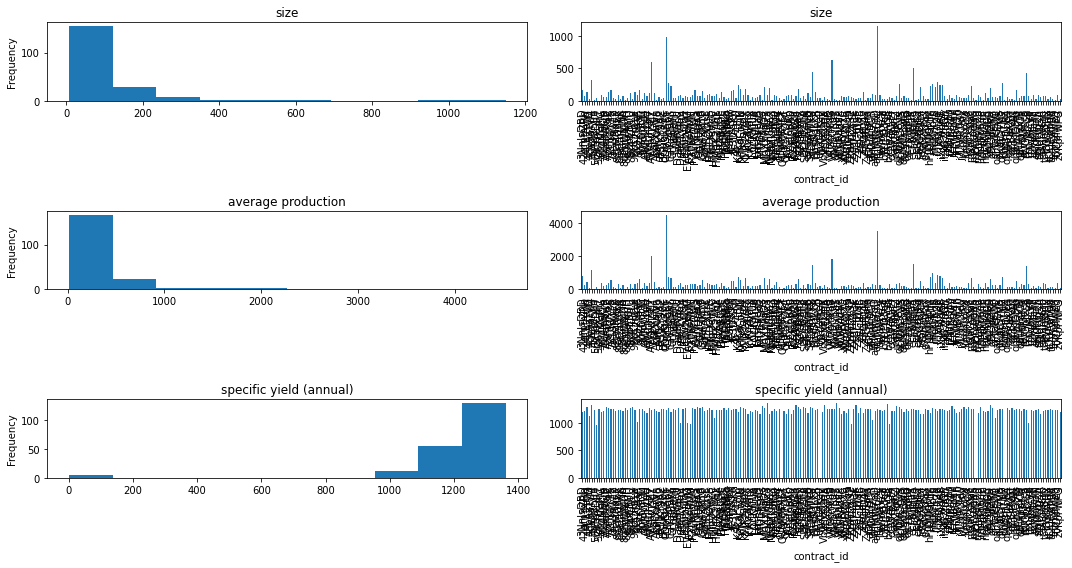

In [102]:
fig, axes = plt.subplots(nrows = 3, ncols = 2)

# plot average solar system size
df.groupby(['contract_id']).mean()['size_kwdc'].plot(kind = 'hist', figsize = (15, 8), ax = axes[0, 0], \
title = 'size')

# plot average solar system production
df.groupby(['contract_id']).mean()['actual_kwh'].plot(kind = 'hist', figsize = (15, 8), ax = axes[1, 0], \
title = 'average production')

# plot average solar system yield
df.groupby(['contract_id']).mean()['system_yield_as_built'].plot(kind = 'hist', figsize = (15, 8), \
ax = axes[2, 0], title = 'specific yield (annual)')

# plot average solar system size
df.groupby(['contract_id']).mean()['size_kwdc'].plot(kind = 'bar', figsize = (15, 8), ax = axes[0, 1], \
title = 'size')

# plot average solar system production
df.groupby(['contract_id']).mean()['actual_kwh'].plot(kind = 'bar', figsize = (15, 8), ax = axes[1, 1], \
title = 'average production')

# plot average solar system yield
df.groupby(['contract_id']).mean()['system_yield_as_built'].plot(kind = 'bar', figsize = (15, 8), \
ax = axes[2, 1], title = 'specific yield (annual)')

plt.tight_layout()

In [7]:
# get average / mean column values by contract (can also do max, min, etc.)

df.groupby(['contract_id']).mean()

,holding_company_id,project_company_id,size_kwdc,actual_kwh,expected_kwh,weather_adjusted_expected_kwh,system_yield_as_built,system_yield_finance,annual_degradation_engr,annual_degradation_finance
contract_id,,,,,,,,,,
3NnJsDBD,30.000000,26.000000,172.80,818.966745,753.852275,804.048556,1202.4,1202.4,0.005,NaN
42gm9ZRb,36.000000,85.000000,72.20,292.040526,336.928888,336.928888,1215.9,1215.9,0.005,NaN
4CLfAuJq,2.594502,32.474227,137.00,421.977237,440.965338,434.769781,1283.0,1283.0,0.005,0.0025
4FbAzTVD,14.839822,44.249166,25.13,75.072695,77.572922,76.059615,1131.0,1131.0,0.005,NaN
4qv9aTyM,4.472401,8.944801,322.90,1127.756060,1185.079051,1159.594450,1318.0,1318.0,0.005,NaN
...,...,...,...,...,...,...,...,...,...,...
tDUAwoqa,7.842105,37.134737,60.06,164.500244,216.353370,209.502031,1248.0,1250.0,0.005,0.0025
tbANVfMW,5.684685,11.369369,32.40,126.611421,116.154486,113.068259,1239.0,1239.0,0.005,NaN
tnmvfwZ9,7.873418,8.075949,15.10,69.384894,66.973181,69.096800,1233.2,1233.2,0.005,NaN


#### 2.3.2 Size

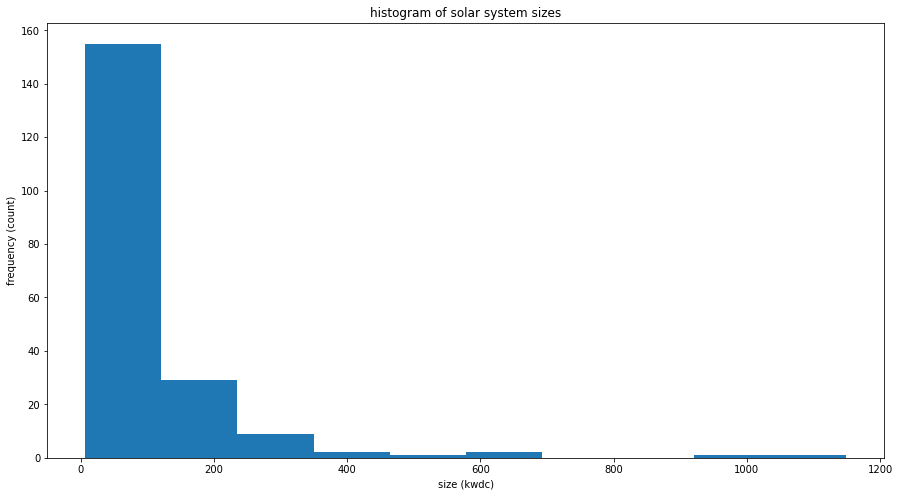

In [146]:
# get an idea of solar system sizes

size_unique = group.apply(lambda x: x['size_kwdc'].unique()[0])
plt.hist(size_unique)
plt.title('histogram of solar system sizes')
plt.xlabel('size (kwdc)')
plt.ylabel('frequency (count)')
plt.show()

Observing contract sizes, the histogram below is heavily skewed left with many small contracts and a few big ones.

#### 2.3.9 Production

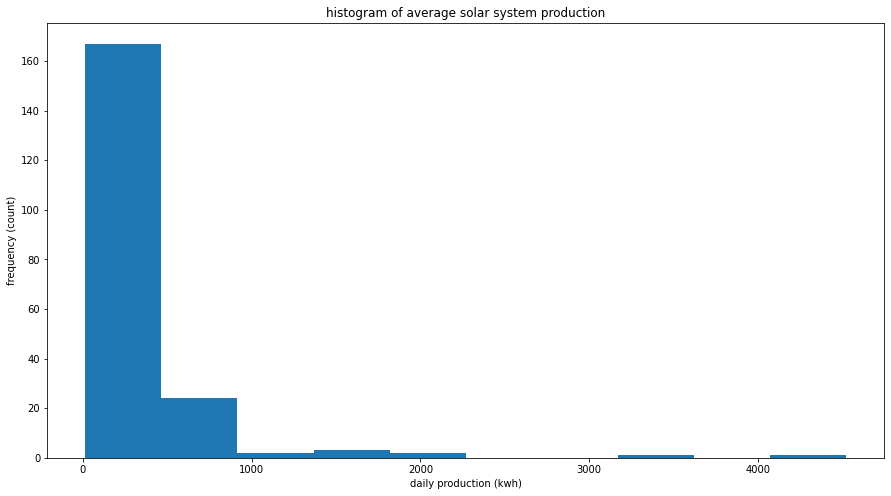

In [147]:
# plot histogram of average solar system production (skewed left w/ many smaller values and some large ones)

avg_contract_production = group.mean()['actual_kwh'] # store average production by contract to use later
plt.hist(avg_contract_production)
plt.title('histogram of average solar system production')
plt.xlabel('daily production (kwh)')
plt.ylabel('frequency (count)')
plt.show()

This plot of average system production looks very similar to the histogram of sizes from above - this makes sense. The plot is again heavily skewed left with a few systems producing very highly and most producing smaller amounts on average. One concerning point is that the first bar does not start from 0, meaning there may be some contracts with net *negative* production. Below, we may want to look into this.

In [88]:
[elem for elem in avg_contract_production.items() if elem[1] < 0]

[('jZWEeuhJ', -108.45584903503901)]

In [89]:
# examine the anomalous contract w/ net negative production

jZWEeuhJ = df[df['contract_id'] == 'jZWEeuhJ']
jZWEeuhJ[jZWEeuhJ['actual_kwh'] < 0] # filter for only negative production values - some EXTREMELY negative

,holding_company_id,project_company_id,contract_id,size_kwdc,production_date,ato_date,actual_kwh,expected_kwh,weather_adjusted_expected_kwh,in_service_date,...,registry_facility_name,cref_short_name,subscriber_orginization,system_yield_as_built,system_yield_finance,annual_degradation_engr,annual_degradation_finance,system age,ages,degradation
43803,21,57,jZWEeuhJ,43.92,2020-10-01,2018-07-10,-203217.536090,150.976558,124.555661,2018-07-10,...,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN,1116,814,0.006957
44315,21,57,jZWEeuhJ,43.92,2020-10-05,2018-07-10,-203769.953827,150.976558,124.555661,2018-07-10,...,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN,1116,818,0.006957
44443,21,57,jZWEeuhJ,43.92,2020-10-06,2018-07-10,-59.278923,150.976558,124.555661,2018-07-10,...,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN,1116,819,0.006957
44571,21,57,jZWEeuhJ,43.92,2020-10-07,2018-07-10,-147.025910,150.976558,124.555661,2018-07-10,...,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN,1116,820,0.006957
44699,21,57,jZWEeuhJ,43.92,2020-10-08,2018-07-10,-155.335679,150.976558,124.555661,2018-07-10,...,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN,1116,821,0.006957
45339,21,57,jZWEeuhJ,43.92,2020-10-13,2018-07-10,-205248.635567,150.976558,124.555661,2018-07-10,...,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN,1116,826,0.006957
45594,21,57,jZWEeuhJ,43.92,2020-10-15,2018-07-10,-205792.877759,150.976558,124.555661,2018-07-10,...,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN,1116,828,0.006957
45721,21,57,jZWEeuhJ,43.92,2020-10-16,2018-07-10,-38.183055,150.976558,124.555661,2018-07-10,...,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN,1116,829,0.006957
46105,21,57,jZWEeuhJ,43.92,2020-10-19,2018-07-10,-206639.162217,150.976558,124.555661,2018-07-10,...,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN,1116,832,0.006957
60484,21,57,jZWEeuhJ,43.92,2021-01-31,2018-07-10,-0.142861,85.334577,86.102588,2018-07-10,...,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN,1116,936,0.006957


Looking further into the contract with negative production, we see, in fact, some VERY extreme negative values. We should probably check if there are more extreme values in the dataset and, if so, delete them so they don't skew our data.

In [92]:
# find all datapoints with actual production values less than -10 (concerning - for further inspection)

anomalies = {}

for i in df.index:
    if df['actual_kwh'][i] < -10:
        try:
            anomalies[df['contract_id'][i]].append((df['production_date'][i], df['actual_kwh'][i]))
        except:
            anomalies[df['contract_id'][i]] = [(df['production_date'][i], df['actual_kwh'][i])]
            
for elem in anomalies.keys():
    print(elem)
    for val in anomalies[elem]:
        print(val)

ek6YqHFq
(Timestamp('2019-01-06 00:00:00'), -41.99239388888888)
(Timestamp('2019-01-08 00:00:00'), -17.999270833333327)
(Timestamp('2019-01-10 00:00:00'), -48.036115555555526)
(Timestamp('2019-01-11 00:00:00'), -47.59431694444445)
(Timestamp('2019-01-16 00:00:00'), -16.59812055555554)
(Timestamp('2019-01-20 00:00:00'), -10.091960277777758)
(Timestamp('2019-01-21 00:00:00'), -24.332235)
(Timestamp('2019-01-22 00:00:00'), -21.9092675)
8EaZmYXK
(Timestamp('2019-04-25 00:00:00'), -5968.855)
ZXE74w3k
(Timestamp('2020-02-07 00:00:00'), -2172.002206388889)
gXwfgdGx
(Timestamp('2020-03-12 00:00:00'), -15.073318611102875)
(Timestamp('2020-03-13 00:00:00'), -32.14882166669122)
(Timestamp('2020-03-14 00:00:00'), -36.57348999999522)
(Timestamp('2020-03-15 00:00:00'), -15.886510555559653)
(Timestamp('2020-03-16 00:00:00'), -36.97634694444423)
(Timestamp('2020-03-17 00:00:00'), -32.73582027776865)
(Timestamp('2020-03-18 00:00:00'), -34.6662927777943)
(Timestamp('2020-03-19 00:00:00'), -18.1433272222

In [98]:
df.drop(df[df['actual_kwh'] < -10].index, inplace = True) # get rid of unreasonably negative values
df.drop(df[df['actual_kwh'] > 10000].index, inplace = True) # and unreasonably positive values

group = df.groupby('contract_id') # re-group for deletion

Now that we've removed the potentially anomalous values we noticed, we can continue with our analysis of production, this time with size.

/Users/katherineli/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


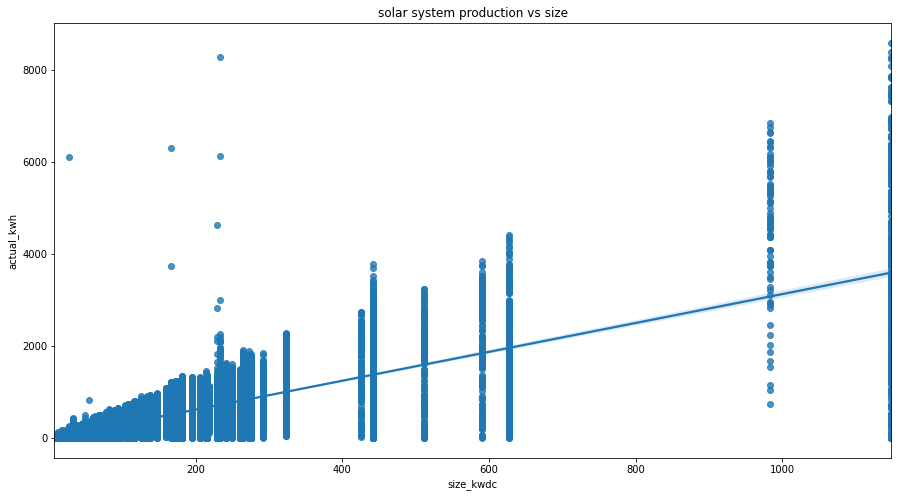

In [148]:
sns.regplot(df['size_kwdc'], df['actual_kwh'])
plt.title('solar system production vs size')
plt.show()

Plotting size against production directly, we do see that the bigger systems have higher max production values compared to smaller ones. However, the variance is also higher. The trend is that production does increase with size, as we would expect. Some smaller contracts also occasionally produce very high power (potentially anomalous, but we can examine this later with specific yield).

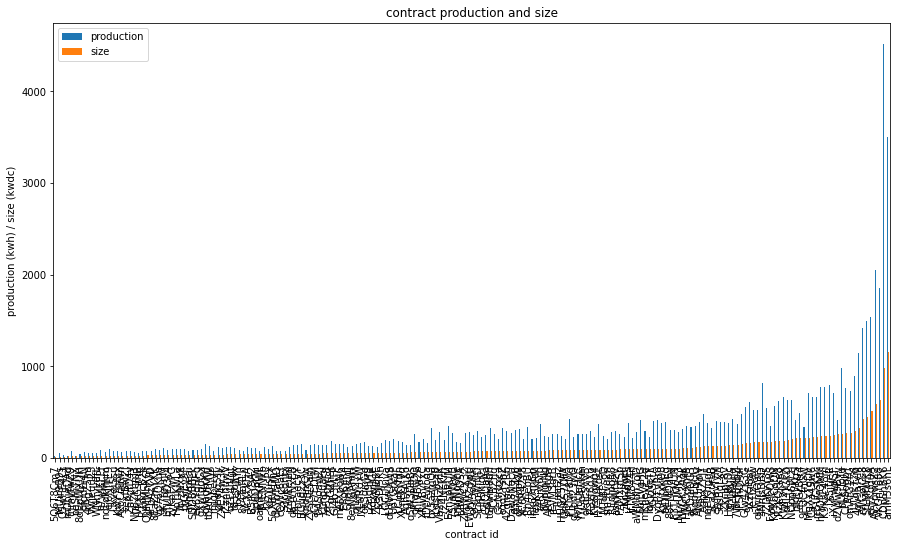

In [149]:
# plot each contract's size versus average (daily) production for comparison (same axes)

df_size_production = pd.DataFrame() # combine to a new dataframe to plot using pandas
df_size_production['production'] = pd.Series(avg_contract_production) # cast production dict as series and add column
df_size_production['size'] = size_unique # size is already a series from earlier, so just add it
df_size_production.sort_values(by = 'size').plot(kind = 'bar', figsize = (15, 8))
plt.title('contract production and size')
plt.xlabel('contract id')
plt.ylabel('production (kwh) / size (kwdc)')
plt.show()

Plotted individually by contract, again, size corresponds with average production. Next, we will examine both of these variables alongside specific yield.

#### 2.3.16 Yield

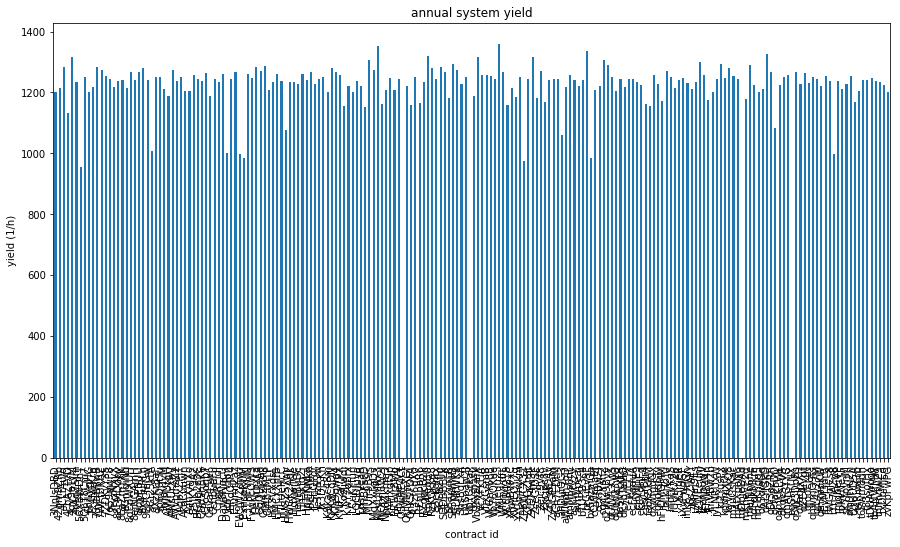

In [152]:
# plot system yield by contract

annual_yield = df.groupby(['contract_id']).mean()['system_yield_as_built']
annual_yield.plot(kind = 'bar', figsize = (15, 8))
plt.title('annual system yield')
plt.xlabel('contract id')
plt.ylabel('yield (1/h)')
plt.show()

At a glance, annual yield as provided in the dataset seems very evenly distributed. Since this is something we can also calculate on our own given that we have data for both production and size, we can do so and see if our self-calculated yield matches the one provided.

In [ ]:
# find and plot ratios of production per size (calculated yield)

df_size_production['yield'] = pd.Series(avg_contract_production)/size_unique # new column to dataframe
df_size_production['yield'].plot(kind = 'bar', figsize = (15, 8))
plt.title('(self-calculated) daily system yield')
plt.xlabel('contract id')
plt.ylabel('yield (1/h)')
plt.show()

The self-calculated specific yield ratios, while still relatively random at a glance, seem to have a much higher variance than the ones provided. This could be due to random variations in production, or it could be a sign that some provided data are off.

In [122]:
# create new columns for annual yield and daily yield to compare to the self-calculated one

df_size_production['annual yield'] = annual_yield
df_size_production['daily yield'] = annual_yield/365

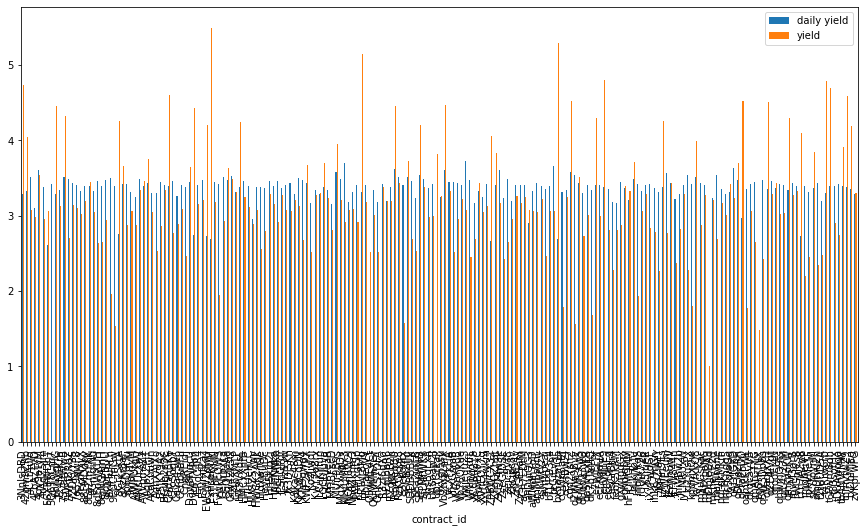

In [123]:
df_size_production[['daily yield', 'yield']].plot(kind = 'bar', figsize = (15, 8))

Plotting calculated yield against provided yield, we can see that there are some gaps in the provided yield plot where there is data for calculated yield. That is, some of the expected yields are 0 where systems are actually producing. This likley means these provided yields are off. We can examine provided vs calculated specific yields in more detail below.

In [136]:
df_size_production['daily yield'].value_counts()

0.000000    4
3.405753    3
3.446575    3
3.408219    3
3.394521    3
           ..
3.441644    1
3.165479    1
3.345205    1
3.293151    1
3.294247    1
Name: daily yield, Length: 169, dtype: int64

In [138]:
df_size_production['yield'].value_counts()

4.739391    1
3.060663    1
5.299599    1
1.795675    1
3.244009    1
           ..
3.272230    1
3.307718    1
3.698247    1
3.232144    1
3.301824    1
Name: yield, Length: 199, dtype: int64

In [137]:
df_size_production['yield'][df_size_production['yield'] == 0]

Series([], Name: yield, dtype: float64)

Again, it is slightly concerning that there are 4 systems for which the reported yield is 0 and 30 for which no yield is reported. It is also a bit strange why some contracts have the same specific yield, down to 6 decimal points. In comparison, our self-calculated specific yields are unique, exist for all contracts (except the one removed earlier), and contain no zeroes. 

In [135]:
np.mean(df_size_production['daily yield']), np.mean(df_size_production['yield'])

(3.2944576712328746, 3.1867188900745087)

Interestingly, too, the average daily yield as averaged using the provided yield is higher than the one averaged using our self-calculated yield, despite the provided data containing zeroes. Further, provided yield is 'system_yield_as_built', the engineering as opposed to finance value, so it's more problematic for it to be inflated or potentially inaccurate. Still, out self-calculated yield may also have problems as production values used to calculate them can fluctuate and throw our calculations off. Since we're not sure which yield is more accurate, we will plot both against production and size to see if there are any trends or correlations between them.

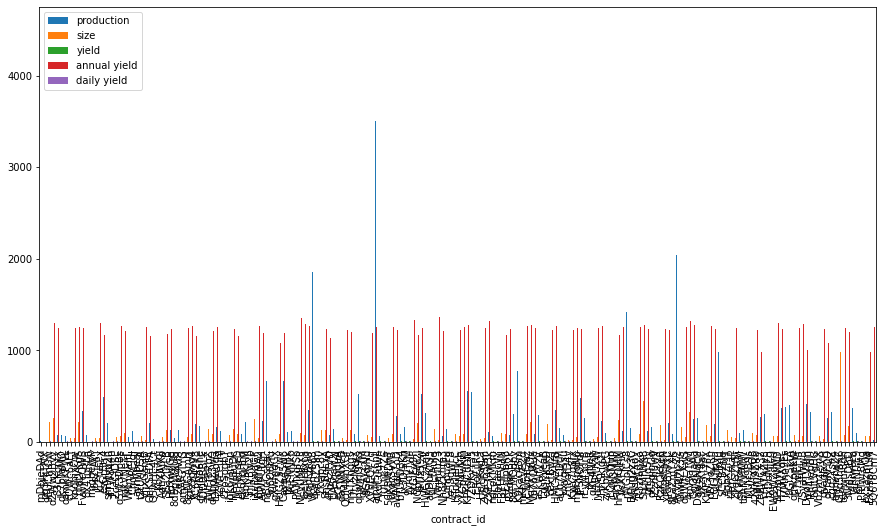

In [141]:
df_size_production.sort_values(by = 'yield').plot(kind = 'bar', figsize = (15, 8))

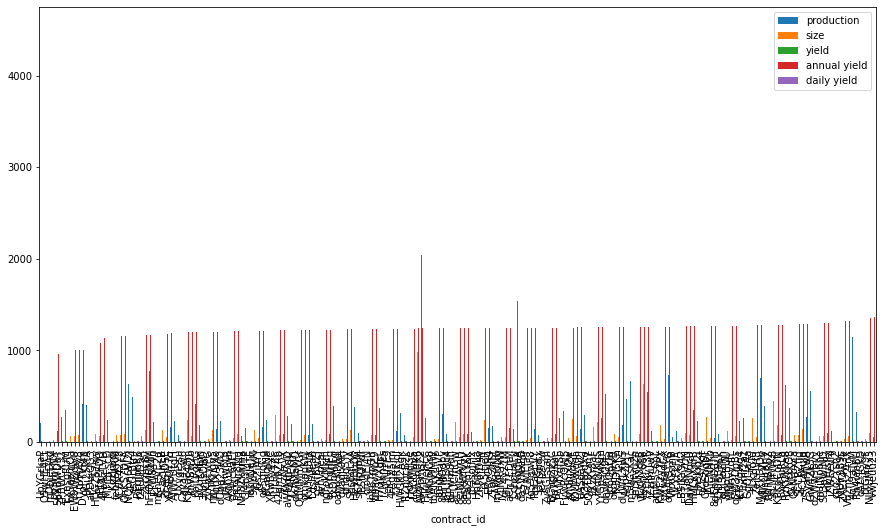

In [142]:
df_size_production.sort_values(by = 'daily yield').plot(kind = 'bar', figsize = (15, 8))

#### 2.3.2 Holding Company

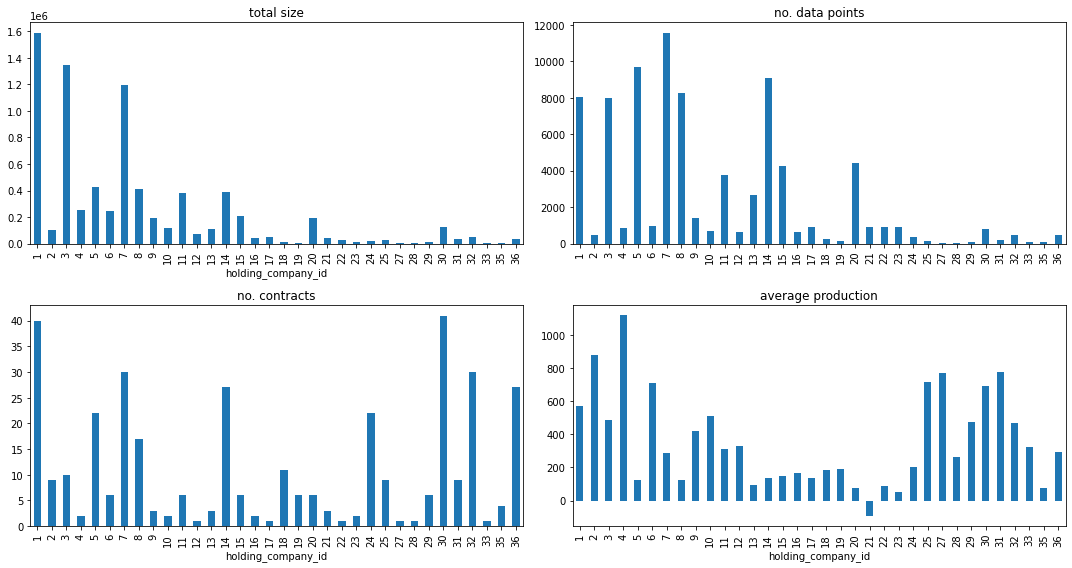

In [70]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# plot total solar system size under each holding company
df.groupby(['holding_company_id']).sum()['size_kwdc'].plot(kind = 'bar', figsize = (15, 8), ax = axes[0, 0], \
title = 'total size')

# plot number of datapoints per holding company
df['holding_company_id'].value_counts().sort_index().plot(kind = 'bar', figsize = (15, 8), ax = axes[0, 1], \
title = 'no. data points')

# plot number of contracts under each holding company
df.groupby('holding_company_id')['contract_id'].unique().str.len().plot(kind = 'bar', figsize = (15, 8), \
ax = axes[1, 0], title = 'no. contracts')

# plot average production under each holding company
df.groupby(['holding_company_id']).mean()['actual_kwh'].plot(kind = 'bar', figsize = (15, 8), ax = axes[1, 1], \
title = 'average production')

plt.tight_layout()

# describe / interpret

#### 2.3.2 Project Company

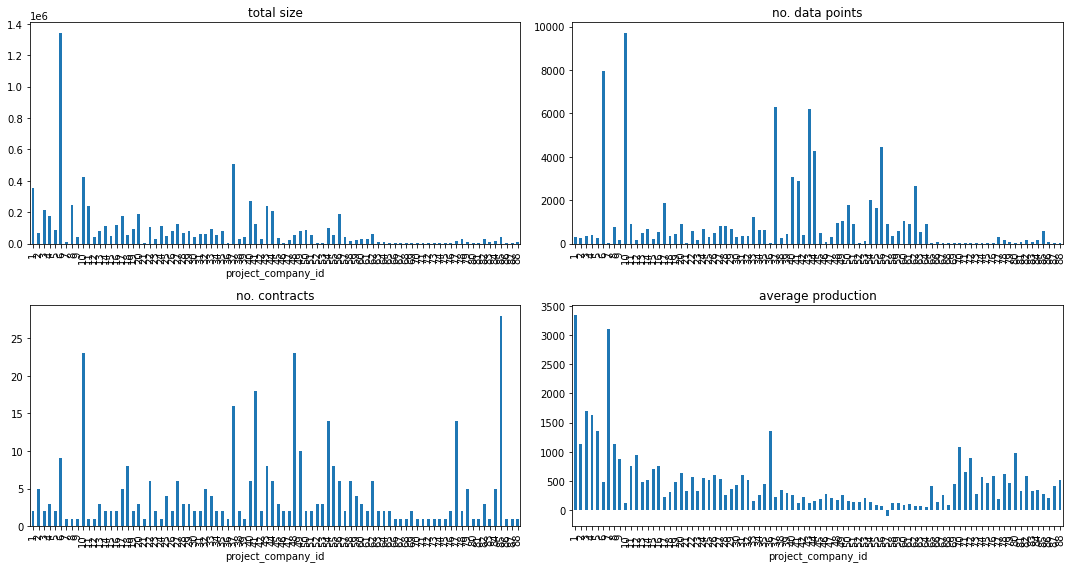

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# plot total solar system size under each project company
df.groupby(['project_company_id']).sum()['size_kwdc'].plot(kind = 'bar', figsize = (15, 8), ax = axes[0, 0], \
title = 'total size')

# plot number of datapoints per project company
df['project_company_id'].value_counts().sort_index().plot(kind = 'bar', figsize = (15, 8), ax = axes[0, 1], \
title = 'no. data points')

# plot number of contracts under each project company
df.groupby('project_company_id')['contract_id'].unique().str.len().plot(kind = 'bar', figsize = (15, 8), \
ax = axes[1, 0], title = 'no. contracts')

# plot average production under each project company
df.groupby(['project_company_id']).mean()['actual_kwh'].plot(kind = 'bar', figsize = (15, 8), ax = axes[1, 1], \
title = 'average production')

plt.tight_layout()

# describe / interpret

#### 2.3.4 Contract ID

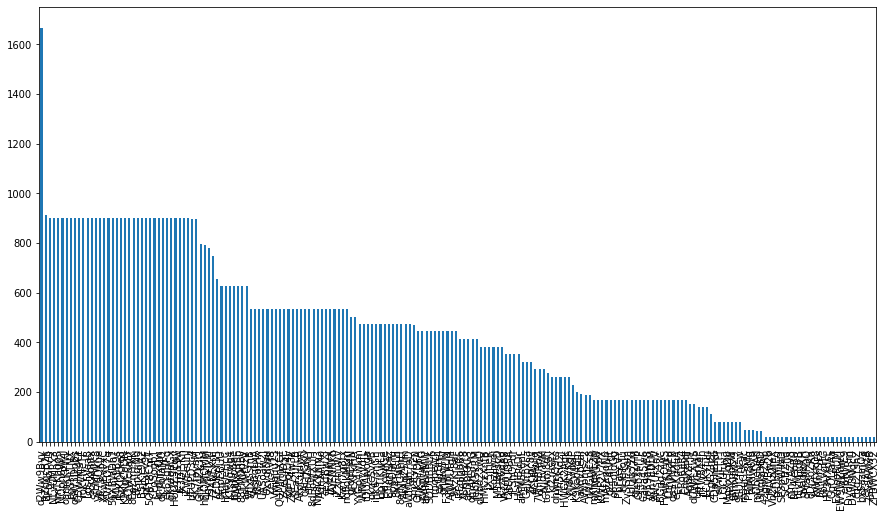

In [10]:
# plot how much data we have from each contract

contracts = df['contract_id'].value_counts() # count data points per contract and store it
contracts.plot(kind = 'bar', figsize = (15, 8))

Examining a simple count of contract IDs, we find many modes - 899 makes sense because data started being collected only on Jan 1, 2019 (899 days before this dataset was extracted), but others may be abnormal. And, since data was only collected from Jan 1, 2019, the contract with almost double that likely contains duplicates or faulty data. The same applies to the other contract with slightly more than 899 data points.

In [11]:
# frequency of number of data points (no. data points, no. contracts with that many data points)

contracts.value_counts()[contracts.value_counts() > 1]

899    34
18     27
535    24
169    23
475    13
444    10
79      7
626     7
383     6
261     5
414     5
353     4
49      3
322     3
291     3
138     3
504     2
44      2
898     2
153     2
186     2
Name: contract_id, dtype: int64

In [12]:
# use this cell to filter for common contract start dates vs ato dates vs service dates

for elem in contracts[contracts == 383].index:
    print(df[df['contract_id'] == elem][['production_date', 'ato_date', 'in_service_date']])

      production_date   ato_date in_service_date
29345      2020-06-01 2020-05-11      2020-05-11
29457      2020-06-02 2020-05-11      2020-05-11
29570      2020-06-03 2020-05-11      2020-05-11
29683      2020-06-04 2020-05-11      2020-05-11
29796      2020-06-05 2020-05-11      2020-05-11
...               ...        ...             ...
83272      2021-06-14 2020-05-11      2020-05-11
83472      2021-06-15 2020-05-11      2020-05-11
83672      2021-06-16 2020-05-11      2020-05-11
83872      2021-06-17 2020-05-11      2020-05-11
84072      2021-06-18 2020-05-11      2020-05-11

[383 rows x 3 columns]
      production_date   ato_date in_service_date
29356      2020-06-01 2020-05-14      2020-05-14
29469      2020-06-02 2020-05-14      2020-05-14
29582      2020-06-03 2020-05-14      2020-05-14
29695      2020-06-04 2020-05-14      2020-05-14
29808      2020-06-05 2020-05-14      2020-05-14
...               ...        ...             ...
83300      2021-06-14 2020-05-14      2020-05

As we can see, there are a number of contracts which only started collecting data on 6/1/2021, 1/1/2021, 1/1/2021, 3/1/2020, 4/1/2020, 4/1/2021, 10/1/2019, 6/1/2020, etc. (in order of frequency) regardless of their ato or in service dates. This likely means they are missing data (there is a gap between the in service date and the actual first production date when we started collecting data). Further, some in-service dates seem to be after our first production date, which shouldn't be the case. Likely these in-service dates are inaccurate.

In [13]:
# find exact discrepancies between in service dates and ato dates

group = df.groupby('contract_id') # group data by contract
ato_unique = group.apply(lambda x: x['ato_date'].unique()[0]) # get a series of ato dates for each contract
inservice_unique = group.apply(lambda x: x['in_service_date'].unique()[0]) # and in-service dates
first_production = group.apply(lambda x: x['production_date'].unique()[0]) # get first registered production date

diff = pd.DataFrame() # dataframe to store differences and spot discrepancies
diff['inservice - ato'] = inservice_unique - ato_unique
diff['production - ato'] = first_production - ato_unique
diff['production - inservice'] = first_production - inservice_unique
with pd.option_context('display.max_rows', None, 'display.max_columns', None): print(diff)

            inservice - ato production - ato production - inservice
contract_id                                                        
3NnJsDBD             0 days          78 days                78 days
42gm9ZRb             0 days          18 days                18 days
4CLfAuJq             1 days          21 days                20 days
4FbAzTVD             5 days          33 days                28 days
4qv9aTyM             0 days          28 days                28 days
4rAgZ5Jm            12 days           7 days                -5 days
56XBWDhT          -146 days          95 days               241 days
5Q6T8Cm7             0 days          34 days                34 days
6bjLVgHG             0 days          18 days                18 days
724NEKrh           -16 days          29 days                45 days
7SyafWwB             0 days          15 days                15 days
7WFfBRbZ             0 days           1 days                 1 days
7ZDKyY35            -1 days          12 days    

As we can see, indeed, in-service dates are a bit inconsistent. We should not see negative values in the dataframe above, but we do, meaning some in-service dates are listed as earlier than the ato dates (which would be illegal if not impossible as you can't turn the system on before you've built it and gotten it approved), and some in-service dates are listed as after the first production day for which we have data (meaning we have 'ghost' data from before the system was turned on). However, there are no negatives in the second column above, meaning ato dates are consistently earlier than starting production dates. As such, ato dates are likely accurate and can be used to replace any negative (e.g. wrong) in-service dates.

Further, there are some contracts where the in-service date is long after the ato date, which might be interesting to flag and look into.

In [14]:
# find any problematic contracts w/ wrong in-service dates

problematic = []
for contract in contracts.index:
    if diff['production - inservice'][contract].days < 0 or diff['inservice - ato'][contract].days < 0:
        problematic.append(contract)
        
print(problematic)

['d2Ww9Bvv', 'oamkKPWL', 'S3cKontx', '56XBWDhT', 'KPKdCoDN', 'btGiEv9F', 'ek6YqHFq', 'hFjQMQMM', '724NEKrh', '7ZDKyY35', 'VfjxGsmB', 'ShsBqLxA', 'UASoaw2J', 'Uxvgi5su', 'Zeic9Vf8', 'QUMMnXGf', 'ZnPofD4v', 'AkoCuuwn', '8dEpWXUH', 'Nh8Zkhm3', 'cexfBwZJ', 'JAjENNkb', 'jZznhuwV', 'KwY7q8rx', 'qfodEj4N', 'HpTiKwLa', 'HdxwiJGe', 'ETumf2az', '9p6Q6tTu', '8ejNGAmH', '4rAgZ5Jm', 'F3THFVUN']


In [15]:
# replace problematic in service dates

for i in df.index:
    if df['contract_id'][i] in problematic:
        df['in_service_date'][i] = df['ato_date'][i]

/Users/katherineli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
# flag any contracts for which in-service date is way after ato date (perhaps unreasonably so)

late_inservice = list(diff[diff['inservice - ato'].apply(lambda x: x.days) > 30].index)
print(late_inservice)

['8dEpWXUH', 'HUGZ57wv', 'HpTiKwLa', 'LCuKYfun', 'QUMMnXGf', 'RzKQkke8', 'S3cKontx', 'UASoaw2J', 'VfjxGsmB', 'XRwBvPxC', 'cQWc6aEf', 'dk7bTaMQ', 'ek6YqHFq', 'gXwfgdGx', 'hFjQMQMM', 'oamkKPWL', 'qfodEj4N']


Now that we have (most likely) accurate in-service dates, we can start to flag and deal with discrepancies in data collection, e.g. differences between age and number of production days.

In [17]:
# find any discrepancies between recorded ages of each contract (from in service date to today) and data points
# (there should be one data point per day, but most don't match)

group = df.groupby('contract_id') # update grouped dataframe since we changed the main one
inservice_fixed = group.apply(lambda x: x['in_service_date'].unique()[0]) # update in service dates
system_age = pd.to_datetime(datetime.date.today()) - inservice_fixed # age = difference from today
pseudo_age = pd.Series() # psuedo ages bc some older contracts only started collecting data on Jan 1 2019
for contract in contracts.index: # set any contracts w/ ato date before Jan 1 2019 to 899 days old
    if inservice_fixed[contract] < pd.to_datetime(datetime.date(2019, 1, 1)):
        pseudo_age[contract] = pd.to_datetime(datetime.date(2021, 6, 18)) - pd.to_datetime(datetime.date(2019, 1, 1))
    else:
        pseudo_age[contract] = system_age[contract]
        
differences = {} # create a dictionary to store differences between age and datapoints per contract (above)

print("Contract \t Age \t Count \t Difference")
for i in range(len(pseudo_age)):
    print(f"{pseudo_age.index[i]} \t {pseudo_age[i].days} \t {contracts[pseudo_age.index[i]]} \t \
{contracts[pseudo_age.index[i]] - pseudo_age[i].days}")
    differences[pseudo_age.index[i]] = contracts[pseudo_age.index[i]] - pseudo_age[i].days

Contract 	 Age 	 Count 	 Difference
d2Ww9Bvv 	 899 	 1668 	 769
RZdqcB2k 	 899 	 912 	 13
4FbAzTVD 	 899 	 899 	 0
NLvUMRx3 	 899 	 899 	 0
nmTKhgg5 	 899 	 899 	 0
NQpn6W2J 	 899 	 899 	 0
oamkKPWL 	 899 	 899 	 0
pgSHiTNX 	 899 	 899 	 0
q5W3DpBs 	 899 	 899 	 0
Q5wHE4Ct 	 899 	 899 	 0
rokVNeTF 	 899 	 899 	 0
LdsFVeaB 	 899 	 899 	 0
S3cKontx 	 899 	 899 	 0
SfLMfWK8 	 899 	 899 	 0
Vp76QKue 	 899 	 899 	 0
XRwBvPxC 	 899 	 899 	 0
XVnEQY7q 	 899 	 899 	 0
56XBWDhT 	 899 	 899 	 0
MUir9B9s 	 899 	 899 	 0
RzKQkke8 	 899 	 899 	 0
KPKdCoDN 	 899 	 899 	 0
cQWc6aEf 	 899 	 899 	 0
8EaZmYXK 	 899 	 899 	 0
8GniqiNd 	 899 	 899 	 0
B5JKY9A2 	 899 	 899 	 0
btGiEv9F 	 899 	 899 	 0
5Q6T8Cm7 	 899 	 899 	 0
CPoSogbT 	 899 	 899 	 0
kndhjxQw 	 899 	 899 	 0
dk7bTaMQ 	 899 	 899 	 0
ek6YqHFq 	 899 	 899 	 0
gXwfgdGx 	 899 	 899 	 0
HUGZ57wv 	 899 	 899 	 0
JeTiz59w 	 899 	 899 	 0
Jx3DJ5Kn 	 899 	 899 	 0
jZWEeuhJ 	 899 	 899 	 0
bTUPD3c4 	 899 	 898 	 -1
sK7fpynM 	 899 	 898 	 -1
Giw4Zk3G

/Users/katherineli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


In [18]:
# count how many contracts have no discrepancies (difference of 0 days between in service and production)

sum(d == 0 for d in differences.values())

34

After counting the number of data points per contract, we want to compare to the number we expect based on the age of each solar system. We calculate this by subtracting the in service date from the date on which this dataset was extracted. As we see above, there are many discrepancies - only 35 out of 200 contracts have the expected number of datapoints! However, most of these values are negative, meaning we have a lot of missing data (as opposed to extra / likely duplicated data). It might be interesting to see just how much data we're missing.

In [19]:
# sum the total number of days for which data seems to be missing

missingtotal = sum(sorted(differences.values())[:157])
print(missingtotal)
np.abs(missingtotal/(len(df.index) + missingtotal)) # as a percentage

-11314


0.15519464486571014

As we can see, we're missing a hefty portion of our data. For now, we will leave the missing data be.

# probably come back to this and figure out how to deal with it - ema??

Next, we're also interested in the contracts with too much data, because we might have duplicates there.

In [20]:
# find any contracts with too much data (more than one per day since it went into service)

pd.Series(differences)[pd.Series(differences) > 0]

d2Ww9Bvv    769
RZdqcB2k     13
hFjQMQMM    206
t6Pwm8dh     63
dtype: int64

In [21]:
# use this cell to examine contracts with potential duplicates listed above

df[df['contract_id'] == 't6Pwm8dh']['production_date'][df[df['contract_id'] == 't6Pwm8dh']\
['production_date'].duplicated()]

60696   2021-02-01
60857   2021-02-02
61018   2021-02-03
61179   2021-02-04
61340   2021-02-05
           ...    
77645   2021-05-14
77819   2021-05-15
77993   2021-05-16
78167   2021-05-17
78341   2021-05-18
Name: production_date, Length: 107, dtype: datetime64[ns]

Indeed, all of the contracts with too much data do have duplicates. Interestingly, some of them are also missing data - the latter two. There might be other contracts with both duplicates and missing data that just cancel to 0, so we'll check all contracts for duplicate production dates. We'll also check some of the general characteristics of these contracts (those with duplicates).

In [42]:
for contract in contracts.index:
    if group.apply(lambda x: x['production_date'])[contract].duplicated().any():
        print(contract)

d2Ww9Bvv
RZdqcB2k
Giw4Zk3G
hFjQMQMM
t6Pwm8dh


In [43]:
# use this cell to filter dataframe for problematic contracts and examine them individually

df[df['contract_id'] == 'd2Ww9Bvv']

,holding_company_id,project_company_id,contract_id,size_kwdc,production_date,ato_date,actual_kwh,expected_kwh,weather_adjusted_expected_kwh,in_service_date,...,registry_facility_name,cref_short_name,subscriber_orginization,system_yield_as_built,system_yield_finance,annual_degradation_engr,annual_degradation_finance,system age,ages,degradation
10,3,6,d2Ww9Bvv,259.8,2019-01-01,2018-08-01,216.092,486.384821,486.384821,2018-08-01,...,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1094,153,0.000354
48,3,6,d2Ww9Bvv,259.8,2019-01-02,2018-08-01,104.560,486.384821,486.384821,2018-08-01,...,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1094,154,0.000354
49,3,6,d2Ww9Bvv,259.8,2019-01-02,2018-08-01,52.417,486.384821,486.384821,2018-08-01,...,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1094,154,0.000354
87,3,6,d2Ww9Bvv,259.8,2019-01-03,2018-08-01,171.890,486.384821,486.384821,2018-08-01,...,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1094,155,0.000354
88,3,6,d2Ww9Bvv,259.8,2019-01-03,2018-08-01,87.335,486.384821,486.384821,2018-08-01,...,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1094,155,0.000354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83268,25,49,d2Ww9Bvv,259.8,2021-06-14,2018-08-01,1243.604,1233.297307,1233.297307,2018-08-01,...,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1094,1048,0.000354
83468,25,49,d2Ww9Bvv,259.8,2021-06-15,2018-08-01,1235.754,1233.297307,1233.297307,2018-08-01,...,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1094,1049,0.000354
83668,25,49,d2Ww9Bvv,259.8,2021-06-16,2018-08-01,1421.949,1233.297307,1233.297307,2018-08-01,...,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1094,1050,0.000354
83868,25,49,d2Ww9Bvv,259.8,2021-06-17,2018-08-01,1497.225,1233.297307,1233.297307,2018-08-01,...,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1094,1051,0.000354


Next, rows with duplicated production dates should be removed. With duplicated production dates, they seem to be mismatched on created_on and actual_kwh, with earlier (presumably non-updated) created_on dates corresponding to higher actual_kwh readings. These earlier readings will be deleted and only more recent created_on data will be maintained.

In [44]:
# delete duplicated data
duplicated = ['RZdqcB2k', 'Giw4Zk3G', 't6Pwm8dh', 'hFjQMQMM', 'd2Ww9Bvv']

for contract in duplicated:
    duplicates = df[df['contract_id'] == contract]['production_date']
    df.drop(duplicates[duplicates.duplicated(keep = 'last')].index, inplace = True)
    
group = df.groupby('contract_id') # re-group data by contract since some rows were deleted

#### 2.3.6 ATO Date

(array([ 4., 17., 18.,  9., 36.,  5., 10.,  7., 26.,  3., 10., 54.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

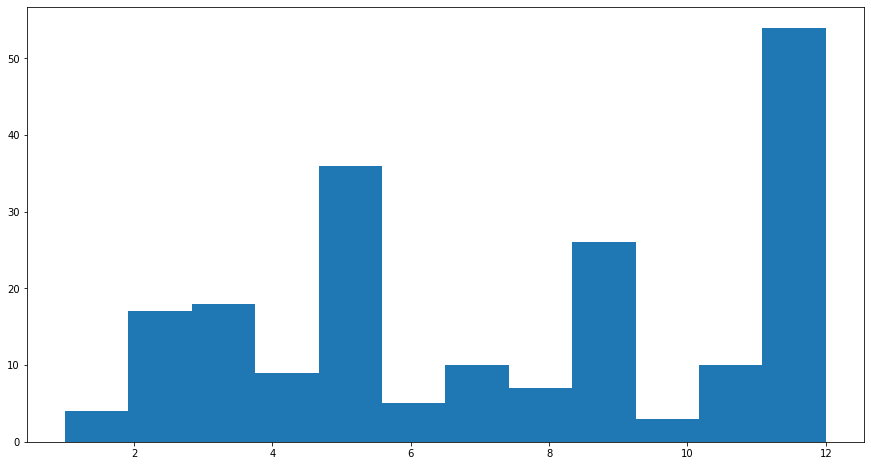

In [51]:
# plot how many systems have been allowed to open each month (total) - to get an idea of monthly trends

ato_month_unique = group.apply(lambda x: x['ato_date'].dt.month.unique()[0])
plt.hist(ato_month_unique, bins = 12)

First, we can plot a histogram of ato dates to see if there is a trend in the month a solar system tends to be created. As we can see, most are created in December as companies rush to meet year-end quotas, and not many are opened in January following. The peak seen in May is likely due to an influx of new contracts this year, May 2021, with our data for 2021 only leading up to mid-June.

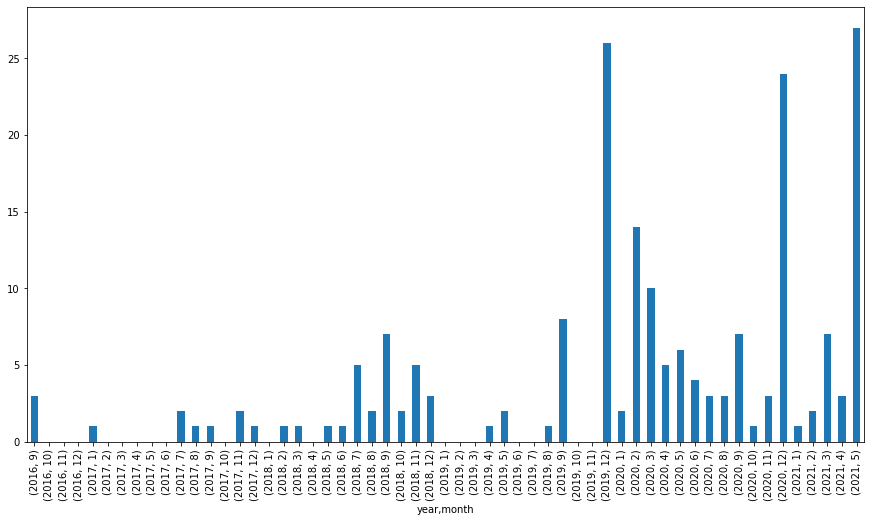

In [57]:
# plot how many systems were approved / completed / ready to open each month since Sep 2016

ato_date_unique = pd.DataFrame() # new dataframe to store data by ato year and month
ato_date_unique['year'] = group.apply(lambda x: x['ato_date'].dt.year.unique()[0]) # columns for year
ato_date_unique['month'] = group.apply(lambda x: x['ato_date'].dt.month.unique()[0]) # and month
ato_date_unique['count'] = 1 # count to keep track
ato_groups = ato_date_unique.groupby([ato_date_unique['year'], ato_date_unique['month']]).count()['count'] 
# count occurrences

# for months with 0 occurences, still add them as indices with values/counts of 0 for the bar plot
year = 2016
month = 9
while year < 2021:
    try:
        ato_groups[(year, month)]
        if month == 12: 
            year += 1
            month = 1
        else: month += 1
    except:
        ato_groups[(year, month)] = 0
        if month == 12: 
            year += 1
            month = 1
        else: month += 1
ato_groups.sort_index(inplace = True)

ato_groups.plot(kind = 'bar', figsize = (15, 8))

Breaking down our ato plot by year as well, we can see that more systems tend to be created each year as the company grows. Systems tend to peak in December, as observed before, and drop significantly for January. The fact that we only have data from September of 2016 may have also inflated the number in the month-only histogram above, causing the peak there. Interestingly, there are some months where no systems are created. Others, very few. However, evident by the peaks, the company must have the capacity to produce new systems quite quickly, making the lows potentially concerning in terms of demand. The peak this May may be due to the big deal with Franklin Park Infrastructure closed earlier this year. Below shows a cumulative plot of total systems over time (as opposed to only new systems created).

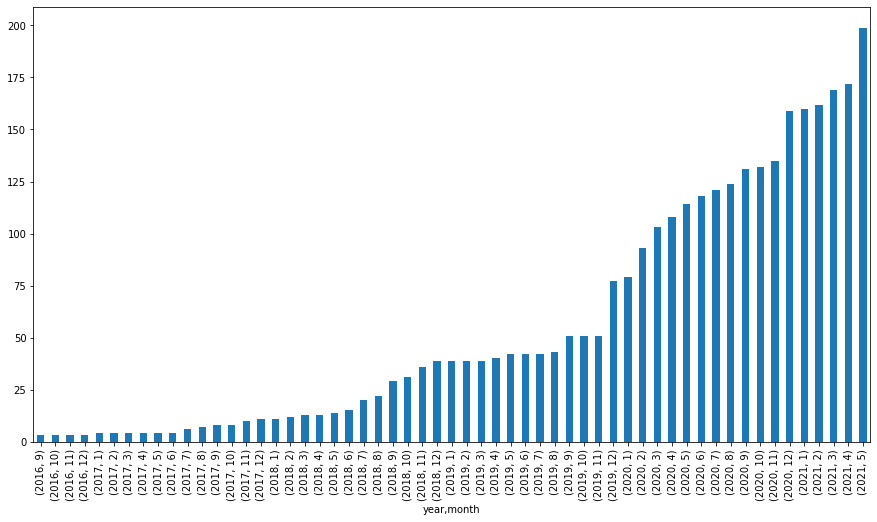

In [58]:
# cumulative number of systems since Sep 2016

ato_groups.cumsum().plot(kind = 'bar', figsize = (15, 8))

#### 2.3.7 In-Service Date

(array([ 4., 17., 18.,  9., 35.,  5.,  8.,  7., 25.,  5.,  7., 59.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

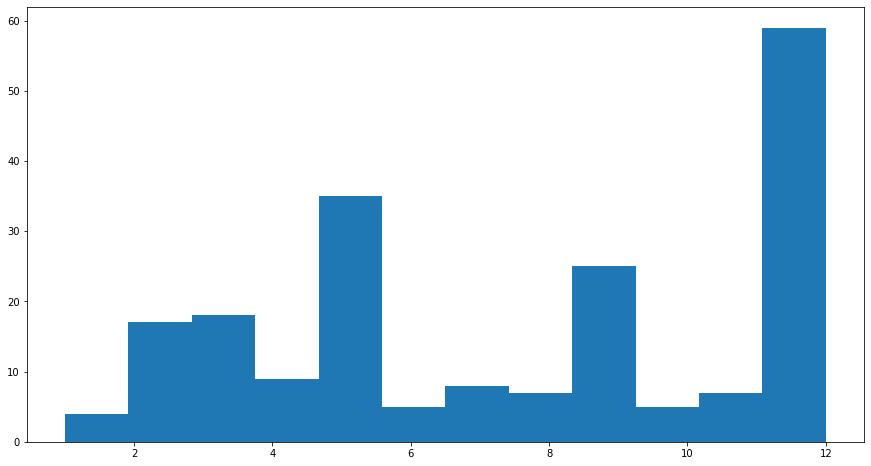

In [56]:
# plot how many systems have actually been opened each month

inservice_month_unique = group.apply(lambda x: x['in_service_date'].dt.month.unique()[0])
plt.hist(inservice_month_unique, bins = 12)

As we can see, the histogram above looks very similar to the one for ATO date and leads to the same conclusions. The same goes for the graphs below.

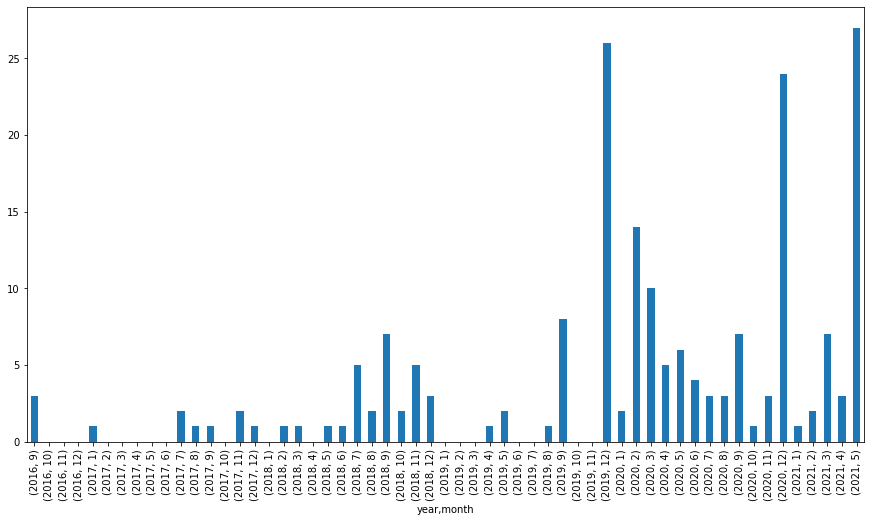

In [59]:
# plot how many systems were actually opened each month since Sep 2016

inservice_date_unique = pd.DataFrame() # new dataframe to store data by in service year and month
inservice_date_unique['year'] = group.apply(lambda x: x['ato_date'].dt.year.unique()[0]) # columns for year
inservice_date_unique['month'] = group.apply(lambda x: x['ato_date'].dt.month.unique()[0]) # and month
inservice_date_unique['count'] = 1 # count to keep track
inservice_groups = inservice_date_unique.groupby([inservice_date_unique['year'], inservice_date_unique['month']])\
.count()['count'] # count occurrences

# for months with 0 occurences, still add them as indices with values/counts of 0 for the bar plot
year = 2016
month = 9
while year < 2021:
    try:
        inservice_groups[(year, month)]
        if month == 12: 
            year += 1
            month = 1
        else: month += 1
    except:
        inservice_groups[(year, month)] = 0
        if month == 12: 
            year += 1
            month = 1
        else: month += 1
inservice_groups.sort_index(inplace = True)

inservice_groups.plot(kind = 'bar', figsize = (15, 8))

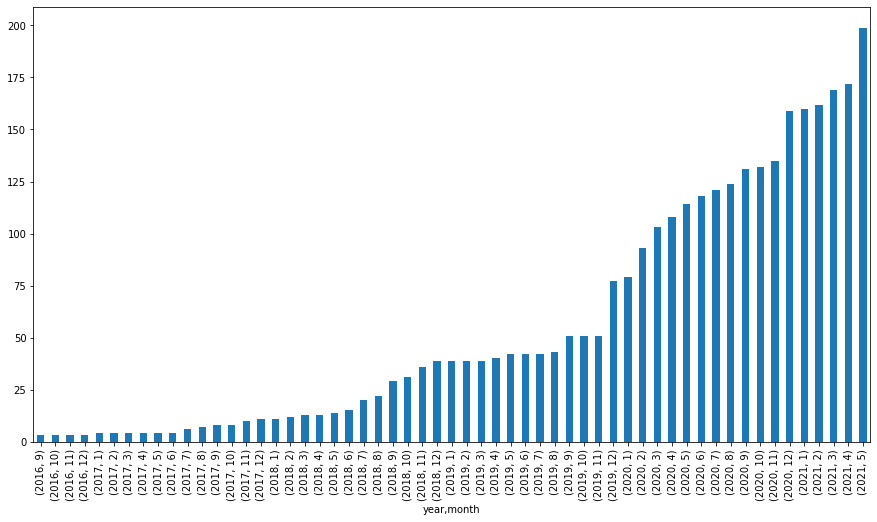

In [60]:
# cumulative number of systems since Sep 2016

inservice_groups.cumsum().plot(kind = 'bar', figsize = (15, 8))

#### 2.3.8 (Production) Date

#### 2.3.10 Host Type

In [45]:
# count unique contracts and type breakdowns for original data and supplementary data (slightly different)

id_unique = group.apply(lambda x: x['host_type'].unique()[0])
print(id_unique.value_counts())
print(extra['host_type'].value_counts())

C&I            199
Residential      1
dtype: int64
C&I            217
Residential    168
Name: host_type, dtype: int64


As we can see, the supplementary data contains more contracts than the original. However, since we are focused on production, which is only found in the first dataframe, we will only be able to use those contracts in the main data. Further, since there is only one residential contract, we can consider it an anomaly or outlier and remove it.

In [46]:
df.drop(df[df['host_type'] == 'Residential'].index, inplace = True)
group = df.groupby('contract_id') # re-group again by contract since some rows were deleted

#### 2.3.11 Revenue Type

#### 2.3.12 Interconnection Type

#### 2.3.13 Registry Facility

#### 2.3.14 CREF

#### 2.3.15 Subscriber Organization

#### 2.3.17 Degradation

In [23]:
# add a column to dataframe for (system) age

df['system age'] = df.apply(lambda x: system_age[x['contract_id']].days, axis=1)

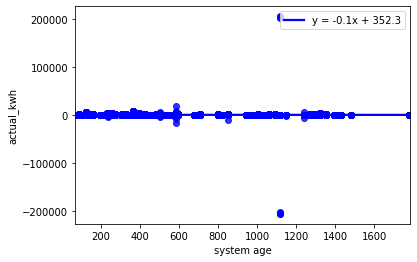

In [24]:
# plot system age versus degradation for an overall idea of degradation across systems

degradation = df[['system age', 'actual_kwh']].dropna()

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(degradation['system age'], degradation['actual_kwh'])

# use line_kws to set line label for legend
ax = sns.regplot(x = 'system age', y = 'actual_kwh', data = degradation, color = 'b', \
line_kws = {'label':"y = {0:.1f}x + {1:.1f}".format(slope,intercept)})

ax.legend()
plt.show() # slope on this graph = daily degradation in kwh

In [25]:
# as a percentage

slope/np.mean(df['actual_kwh'].dropna())

-0.00036761333391171526

In [26]:
# next, create a column for individual ages (for each data point, what's the age of the system at that point?)

df['ages'] = (df['production_date'] - df['in_service_date']).dt.days

In [27]:
# regression to find degradation per contract / system

degradations = {}

for contract in contracts.index:
    df = df[df['contract_id'] == contract][['ages', 'actual_kwh']].dropna()
    if not df.empty:
        degradations[contract] = stats.linregress(df['ages'], df['actual_kwh'])

In [28]:
# convert degradation to percentages

degradation_percent = {}
for elem in degradations.items():
    degradation_percent[elem[0]] = elem[1][0]/(group.mean()['actual_kwh'][elem[0]])
    
degradation_percent.values()

dict_values([0.0003535193859161902, -0.00028185239093208713, -0.00014165562197456598, -0.0002182027291835325, -3.1913545447492366e-05, -4.1950019672938114e-05, 0.0029913501293404193, -0.001697160514279253, -3.9528102533332815e-05, -2.594831736411236e-05, -7.81734085035953e-05, 5.234635629726004e-06, 0.002934921872358674, 3.8023918893525755e-05, -0.00010277790974891473, -2.8508480013048954e-05, -0.00020432774304810308, -0.00019774429977088723, 0.00034164930923739846, 0.00036175794492506716, -0.00024693446542874603, 0.0029364970375520194, -9.633327240896985e-05, -8.919903982883829e-05, -9.251380567951354e-05, -3.3152401701930424e-05, 0.0003745986184224098, -0.00042621607511568856, 0.0029412483929840225, 0.0030003152271738656, 0.00015701279494258013, -0.00034242485593974695, -0.00010684227054644879, -0.00013462305095751187, -0.0003581984578622591, 0.006957235734523031, -9.153128875079801e-05, -0.00010021615331571527, 2.3144848025863977e-06, -0.00041384518720327505, -0.0002162312377279048,

In [30]:
# average degradation after breaking down by contract

np.mean(list(degradation_percent.values()))

0.001618663194094827

In [32]:
# add a new column for degradation by contract

df['degradation'] = df.apply(lambda row: degradation_percent[row.contract_id], axis=1)

### 2.4 Summary on Data Quality
In this section, I'll examine the quality of the data, e.g. completeness, consistency, formatting, and report any potential problems and solutions.

# 3 Data Preparation
## 3.1 Feature Selection
Determine which data will be used (selection of attributes/columns and observations/rows) and document reasons for inclusion or exclusion. 
## 3.2 Data Cleaning
Clean the data and describe actions taken. Techniques could include selection of subsets for examination, insertion of defaults or estimations using modelling for missing values. Note outliers/anomalies and potential impacts of these transformations on analysis results. 
## 3.3 Feature Engineering
It may be useful to derive new attributes from the data as combinations of existing attributes, and describe their creation. It may also be useful to merge or aggregate datasets, in which case you should be careful of duplicate values. 
## 3.4 Data Reformating
Finally, re-format the data as necessary (e.g. shuffling the order of inputs to a neural network or making syntactic changes like trimming field lengths).

# 4 Modelling
## 4.1 Model Selection
Select and document any modeling techniques to be used (regression, decision tree, neural network) along with assumptions made (uniform distribution, data type). 
## 4.2 Test Design
Before building the model, generate test design - will you need to split your data (e.g. into training, test, and validation sets), and if so, how? 
## 4.3 Parameter tuning
Next, run the selected modeling tool(s) on your data, list parameters used with justifications, and describe and interpret resulting models. 
## 4.4 Model Evaluation
Generally, you want to run different models with different parameters, then compare the results across the evaluation criteria established in earlier steps. Assess the quality or accuracy of each model, revise and tune iteratively.


# 5 Evaluation
## 5.1 Results
Summarize the results of the previous step in business terms - how well were your business objective(s) met? Models that meet business success criteria become approved models. 
## 5.2 Summary
After selecting appropriate models, review the work accomplished. Make sure models were correctly built, no important factors or tasks were overlooked, and all data are accessible/replicable for future analyses. 
## 5.3 Next Steps
Depending on assessed results, decide next steps, whether to move on to deployment, initiate further iterations, or move on to new data mining projects.

# 6 Deployment
## 6.1 Deployment Plan
Develop a plan for deploying relevant model(s). 
## 6.2 Monitoring Plan
Further develop a monitoring and maintenance plan to ensure correct usage of data mining results and avoid issues during the operational phase of model(s). 
## 6.3 Conduct Retrospective
Summarize results, conclusions and deliverables. Conduct any necessary retrospective analysis of what went well, what could be improved, and general experience documentation.